#TP1

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

#1) Text.png

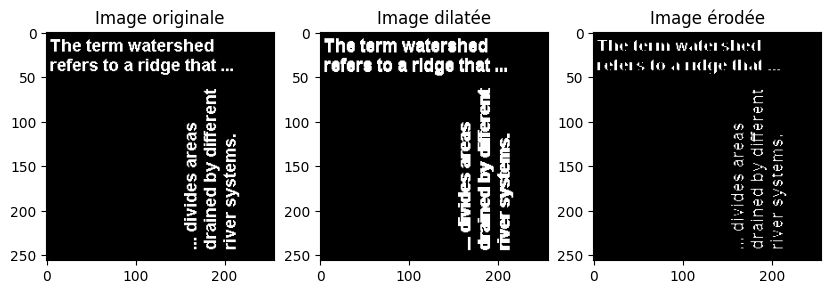

In [ ]:
# Charger l'image
image = cv2.imread('/content/sample_data/text.png', cv2.IMREAD_GRAYSCALE)

kernel = np.array([[0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0]], dtype=np.uint8)
# Dilatation
dilated_image = cv2.dilate(image, kernel, iterations=1)

# Érosion
eroded_image = cv2.erode(image, kernel, iterations=1)

plt.figure(figsize=(10, 5))

plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Image originale')
plt.subplot(132), plt.imshow(dilated_image, cmap='gray'), plt.title('Image dilatée')
plt.subplot(133), plt.imshow(eroded_image, cmap='gray'), plt.title('Image érodée')

plt.show()

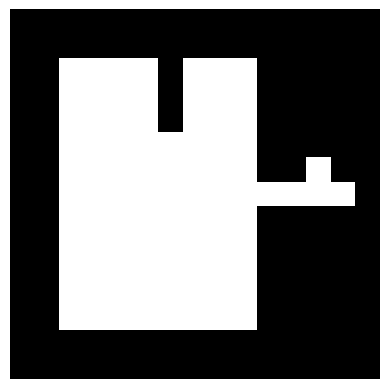

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rows = 15
cols = 15
matrix = np.zeros((rows, cols), dtype=int)

# Modifier quelques pixels pour qu'ils soient égaux à 1
matrix[2:13, 2:6] = 1
matrix[2:13,7:10] = 1
matrix[5:13,6] = 1
matrix[7,10:14] = 1
matrix[6:7,12] = 1


# Afficher la matrice sous forme d'image
plt.imshow(matrix, cmap='gray', interpolation='nearest')
plt.axis('off')  # Désactiver les axes
plt.show()

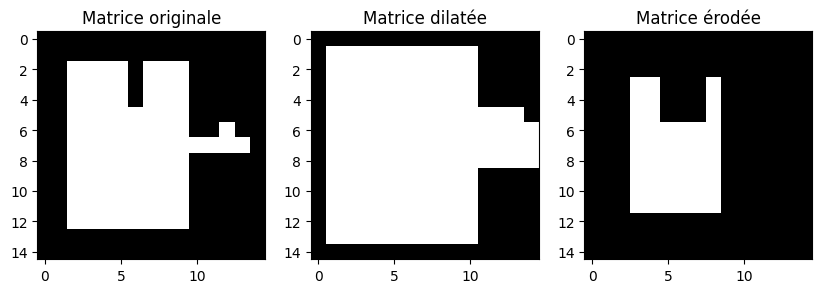

In [ ]:
# Définir l'élément structurant (kernel) pour la dilatation et l'érosion
kernel = np.ones((3, 3), np.uint8)

# Dilatation
dilated_matrix = cv2.dilate(matrix.astype(np.uint8), kernel, iterations=1)

# Érosion
eroded_matrix = cv2.erode(matrix.astype(np.uint8), kernel, iterations=1)

plt.figure(figsize=(10, 3))

plt.subplot(131), plt.imshow(matrix, cmap='gray', interpolation='nearest'), plt.title('Matrice originale')
plt.subplot(132), plt.imshow(dilated_matrix, cmap='gray', interpolation='nearest'), plt.title('Matrice dilatée')
plt.subplot(133), plt.imshow(eroded_matrix, cmap='gray', interpolation='nearest'), plt.title('Matrice érodée')

plt.show()

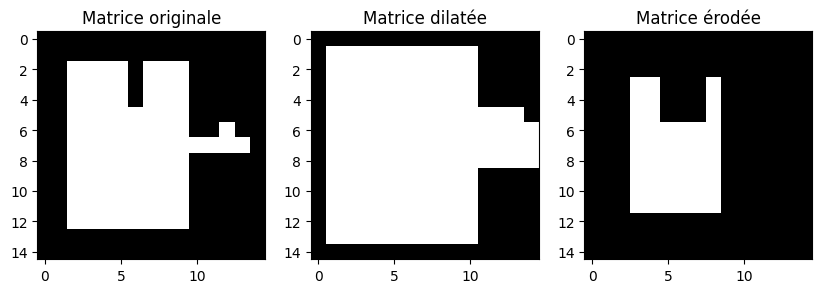

In [ ]:
kernel = np.ones((3, 3), np.uint8)

# Dilatation
dilated_matrix = cv2.dilate(matrix.astype(np.uint8), kernel, iterations=1)

# Érosion
eroded_matrix = cv2.erode(matrix.astype(np.uint8), kernel, iterations=1)


plt.figure(figsize=(10, 3))
plt.subplot(131), plt.imshow(matrix, cmap='gray', interpolation='nearest'), plt.title('Matrice originale')
plt.subplot(132), plt.imshow(dilated_matrix, cmap='gray', interpolation='nearest'), plt.title('Matrice dilatée')
plt.subplot(133), plt.imshow(eroded_matrix, cmap='gray', interpolation='nearest'), plt.title('Matrice érodée')

plt.show()

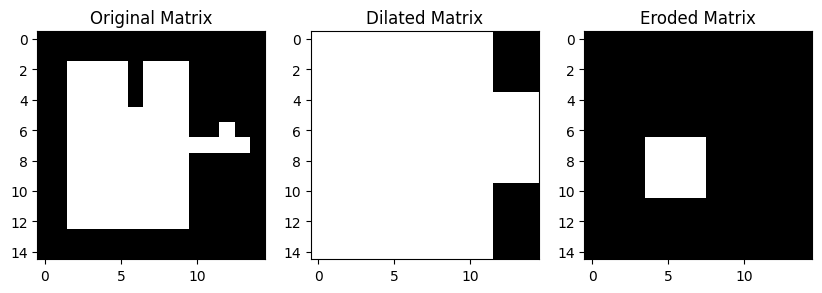

In [ ]:
kernel_size = 5
structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))

# Dilatation
dilated_matrix = cv2.dilate(matrix.astype(np.uint8), structuring_element, iterations=1)

# Érosion
eroded_matrix = cv2.erode(matrix.astype(np.uint8), structuring_element, iterations=1)

plt.figure(figsize=(10, 3))
plt.subplot(131), plt.imshow(matrix, cmap='gray', interpolation='nearest'), plt.title('Original Matrix')
plt.subplot(132), plt.imshow(dilated_matrix, cmap='gray', interpolation='nearest'), plt.title('Dilated Matrix')
plt.subplot(133), plt.imshow(eroded_matrix, cmap='gray', interpolation='nearest'), plt.title('Eroded Matrix')

plt.show()


#2) brain.png & blood.png

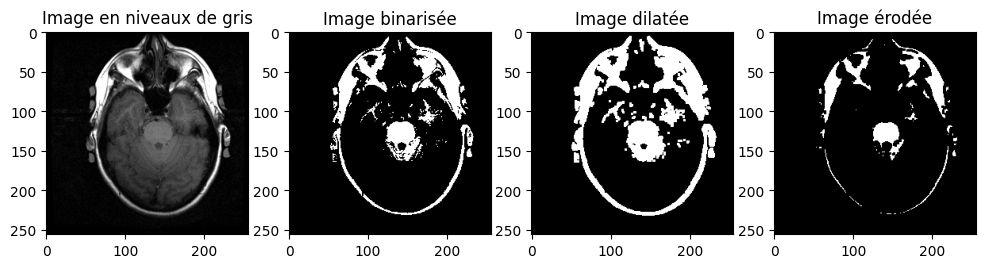

In [ ]:
image_gray = cv2.imread('/content/sample_data/brain.png', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)
kernel_size = 3
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Dilatation
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

# Érosion
eroded_image = cv2.erode(binary_image, kernel, iterations=1)

plt.figure(figsize=(12, 4))

plt.subplot(141), plt.imshow(image_gray, cmap='gray'), plt.title('Image en niveaux de gris')
plt.subplot(142), plt.imshow(binary_image, cmap='gray'), plt.title('Image binarisée')
plt.subplot(143), plt.imshow(dilated_image, cmap='gray'), plt.title('Image dilatée')
plt.subplot(144), plt.imshow(eroded_image, cmap='gray'), plt.title('Image érodée')

plt.show()

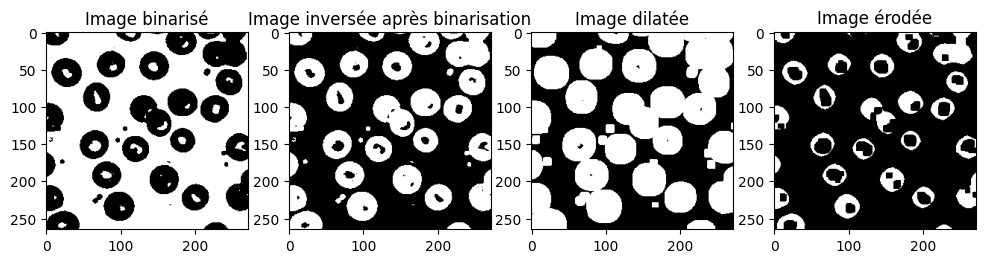

In [ ]:
image_gray = cv2.imread('/content/sample_data/BLOOD1.png', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)

# Inverser les couleurs
inverted_image = cv2.bitwise_not(binary_image)

# Définir l'élément structurant (kernel) pour la dilatation et l'érosion
kernel_size = 7
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Dilatation
dilated_image = cv2.dilate(inverted_image, kernel, iterations=1)

# Érosion
eroded_image = cv2.erode(inverted_image, kernel, iterations=1)

plt.figure(figsize=(12, 4))

plt.subplot(141), plt.imshow(binary_image, cmap='gray'), plt.title('Image binarisé')
plt.subplot(142), plt.imshow(inverted_image, cmap='gray'), plt.title('Image inversée après binarisation')
plt.subplot(143), plt.imshow(dilated_image, cmap='gray'), plt.title('Image dilatée')
plt.subplot(144), plt.imshow(eroded_image, cmap='gray'), plt.title('Image érodée')

plt.show()

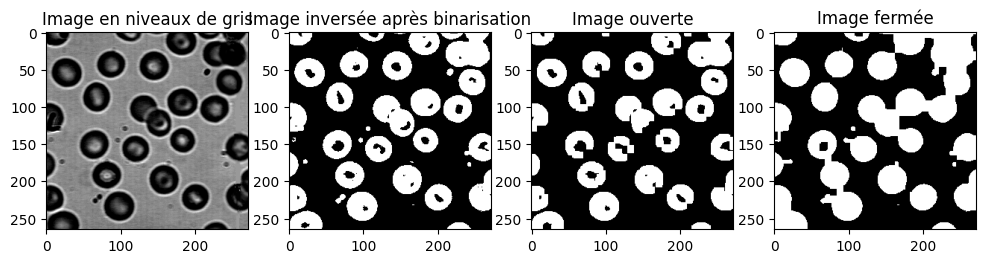

In [ ]:
# Binariser l'image (utilisation d'une valeur de seuil comme 127)
_, binary_image = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)

# Inverser les couleurs
inverted_image = cv2.bitwise_not(binary_image)

kernel_size = 9
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Ouverture
opened_image = cv2.morphologyEx(inverted_image, cv2.MORPH_OPEN, kernel)

# Fermeture
closed_image = cv2.morphologyEx(inverted_image, cv2.MORPH_CLOSE, kernel)

# Afficher les images originales et traitées
plt.figure(figsize=(12, 4))

plt.subplot(141), plt.imshow(image_gray, cmap='gray'), plt.title('Image en niveaux de gris')
plt.subplot(142), plt.imshow(inverted_image, cmap='gray'), plt.title('Image inversée après binarisation')
plt.subplot(143), plt.imshow(opened_image, cmap='gray'), plt.title('Image ouverte')
plt.subplot(144), plt.imshow(closed_image, cmap='gray'), plt.title('Image fermée')

plt.show()

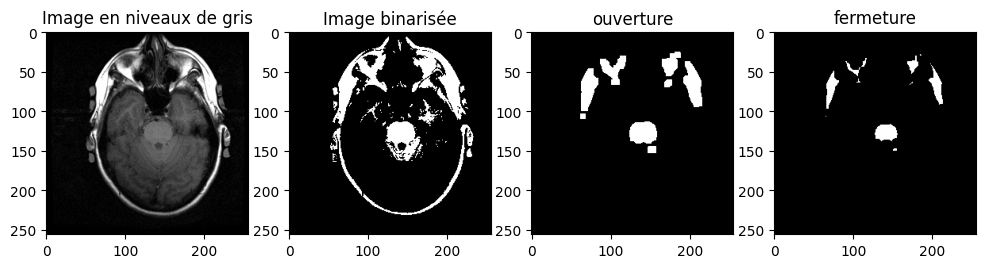

In [ ]:
image_gray = cv2.imread('/content/sample_data/brain.png', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)


# Définir l'élément structurant (kernel) pour la dilatation et l'érosion
kernel_size = 7
kernel = np.ones((kernel_size, kernel_size), np.uint8)

#ouverture
eroded_image = cv2.erode(binary_image, kernel, iterations=1)
dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)

# fermeture
dilated_image2 = cv2.dilate(binary_image, kernel, iterations=1)
eroded_image1 = cv2.erode(dilated_image2, kernel, iterations=1)

plt.figure(figsize=(12, 4))

plt.subplot(141), plt.imshow(image_gray, cmap='gray'), plt.title('Image en niveaux de gris')
plt.subplot(142), plt.imshow(binary_image, cmap='gray'), plt.title('Image binarisée')
plt.subplot(143), plt.imshow(dilated_image, cmap='gray'), plt.title('ouverture')
plt.subplot(144), plt.imshow(eroded_image, cmap='gray'), plt.title('fermeture')

plt.show()

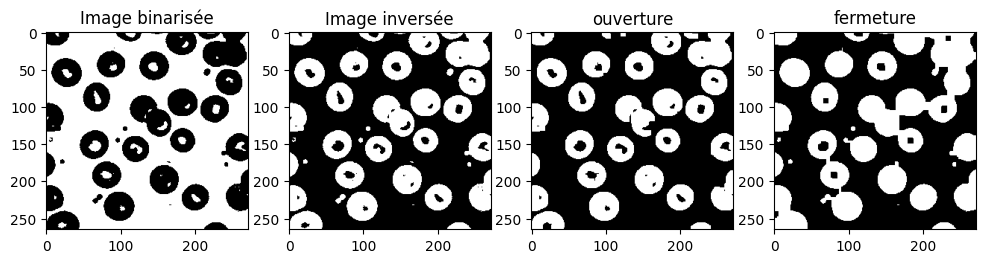

In [ ]:
image_gray = cv2.imread('/content/sample_data/BLOOD1.png', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)

inverted_image = cv2.bitwise_not(binary_image)

# Définir l'élément structurant (kernel) pour la dilatation et l'érosion
kernel_size = 20
structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))

#ouverture
eroded_image = cv2.erode(inverted_image, kernel, iterations=1)
dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)

# fermeture
dilated_image2 = cv2.dilate(inverted_image, kernel, iterations=1)
eroded_image1 = cv2.erode(dilated_image2, kernel, iterations=1)

plt.figure(figsize=(12, 4))

plt.subplot(141), plt.imshow(binary_image, cmap='gray'), plt.title('Image binarisée')
plt.subplot(142), plt.imshow(inverted_image, cmap='gray'), plt.title('Image inversée')
plt.subplot(143), plt.imshow(dilated_image, cmap='gray'), plt.title('ouverture')
plt.subplot(144), plt.imshow(eroded_image1, cmap='gray'), plt.title('fermeture')

plt.show()